## Pandas refreshers

Pandas is mostly used just to **read data, fix missing values, mask** and change it to **numpy array**. 

It is also used to quickly visualize data from files

In [1]:
import pandas as pd
pd.__version__

'0.23.4'

### Read CSV

Returns a **padas.DataFrame** object

In [3]:
pd.read_csv('files/data_csv.csv')

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


### Read JSON

In [36]:
#if the json is in format
#{column1 : [values_list], column2 : [values_list]}
pd.read_json('files/data_json.json')

,color,fruit,size
0,Red,Apple,Large
1,yellow,orange,medium


In [37]:
#Or in format [{col1:val,col2:val}, {col1:val,col2:val}]
pd.read_json('files/data_json_records.json',orient='records')

,color,fruit,size
0,Red,Apple,Large
1,Yellow,Orange,Medium


### Slice

In [38]:
df = pd.read_csv('files/data_csv.csv')
type(df)

pandas.core.frame.DataFrame

In [40]:
df["Salary"]

0    72000.0
1    48000.0
2    54000.0
3    61000.0
4        NaN
5    58000.0
6    52000.0
7    79000.0
8    83000.0
9    67000.0
Name: Salary, dtype: float64

In [42]:
df[["Country","Salary"]]

,Country,Salary
0,France,72000.0
1,Spain,48000.0
2,Germany,54000.0
3,Spain,61000.0
4,Germany,NaN
5,France,58000.0
6,Spain,52000.0
7,France,79000.0
8,Germany,83000.0
9,France,67000.0


### View statistic

In [43]:
df.describe()

,Age,Salary
count,9.000000,9.000000
mean,38.777778,63777.777778
std,7.693793,12265.579662
min,27.000000,48000.000000
25%,35.000000,54000.000000
50%,38.000000,61000.000000
75%,44.000000,72000.000000
max,50.000000,83000.000000


### Mask

Works just like **numpy**

In [44]:
#Masking just like numpy
df[df['Salary']>60000]

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
3,Spain,38.0,61000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


### Get numpy array from DataFrame

In [47]:
#Get the numpy array
df.values

array([['France', 44.0, 72000.0, 'No'],
       ['Spain', 27.0, 48000.0, 'Yes'],
       ['Germany', 30.0, 54000.0, 'No'],
       ['Spain', 38.0, 61000.0, 'No'],
       ['Germany', 40.0, nan, 'Yes'],
       ['France', 35.0, 58000.0, 'Yes'],
       ['Spain', nan, 52000.0, 'No'],
       ['France', 48.0, 79000.0, 'Yes'],
       ['Germany', 50.0, 83000.0, 'No'],
       ['France', 37.0, 67000.0, 'Yes']], dtype=object)

### Sample data

In [3]:
import numpy as np

In [11]:
x = np.linspace(0,10,100000).reshape(-1,1) #otherwise we cant concat along axis 1 (use vstack instead?)
y = (np.linspace(0,10,100000) + np.random.normal(0,0.01,100000)).reshape(-1,1)

In [13]:
df = pd.DataFrame(np.concatenate((x,y),axis=1),columns=["X","Y"])

In [14]:
df.head() #shows the first five elements

,X,Y
0,0.0000,0.015176
1,0.0001,0.006938
2,0.0002,0.008640
3,0.0003,0.001290
4,0.0004,0.016184


In [15]:
df.sample(n=10) #samples 10 random elements

,X,Y
2029,0.202902,0.190949
73792,7.379274,7.377391
69128,6.912869,6.927882
50606,5.060651,5.055054
47980,4.798048,4.802660
79788,7.978880,7.993227
43684,4.368444,4.379953
73852,7.385274,7.383774
73325,7.332573,7.336620
2365,0.236502,0.242109


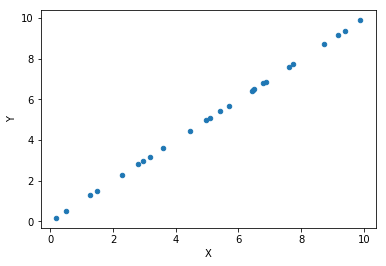

In [18]:
#More on data visualization refresher. It will be difficult to plot million points. so we plot a sample
%matplotlib inline
df.sample(n=25).plot(x='X',y='Y',kind='scatter')